# Loop 69 Analysis: CV-LB Relationship and Strategy Assessment

## Current Status
- 21 submissions made, 5 remaining
- Best LB: 0.0877 (exp_030)
- Best CV: 0.0081 (exp_049, exp_050, exp_053)
- Target: 0.0347
- Gap to target: 0.0530 (60.8% reduction needed)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},  # Best LB
]

df = pd.DataFrame(submissions)
print(f'Submissions with LB scores: {len(df)}')
print(df)

Submissions with LB scores: 11
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'\nCV-LB Linear Relationship:')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nIntercept = {intercept:.4f}')
print(f'Target = 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'Even with CV=0, expected LB would be {intercept:.4f}')


CV-LB Linear Relationship:
LB = 4.3042 * CV + 0.0524
R² = 0.9675

Intercept = 0.0524
Target = 0.0347

CRITICAL: Intercept (0.0524) > Target (0.0347)
Even with CV=0, expected LB would be 0.0524


In [3]:
# Calculate required CV to hit target
target = 0.0347
required_cv = (target - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE: Required CV is negative!')
else:
    print(f'Need to reduce CV from {df["cv"].min():.4f} to {required_cv:.4f}')


Required CV to hit target: -0.004118
IMPOSSIBLE: Required CV is negative!


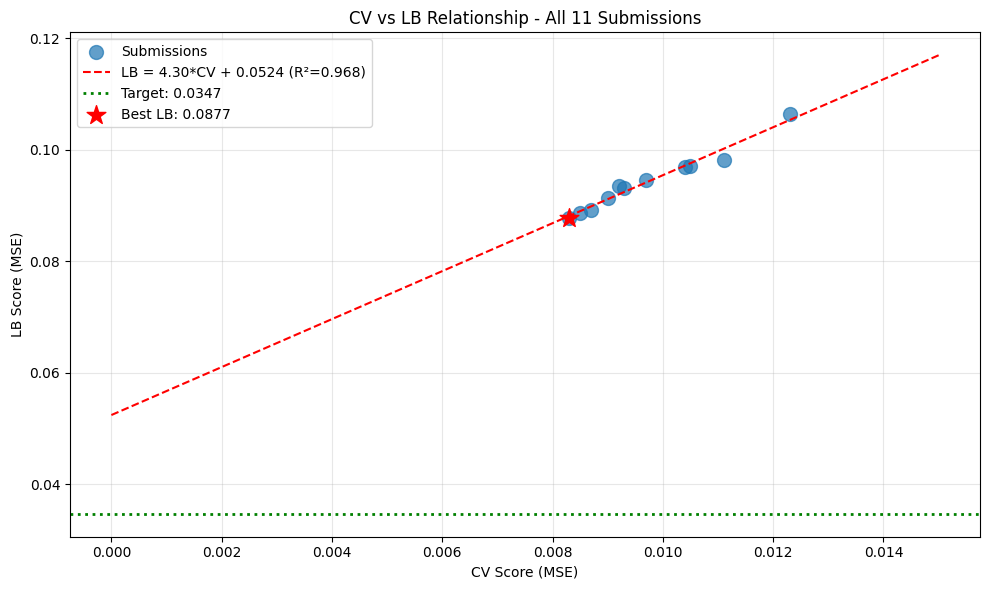


Gap Analysis:
Best LB: 0.0877
Target: 0.0347
Gap: 0.0530
Reduction needed: 60.4%


In [4]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r2:.3f})')

# Mark target
plt.axhline(y=target, color='g', linestyle=':', linewidth=2, label=f'Target: {target}')

# Mark best LB
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', 
            label=f'Best LB: {df.loc[best_idx, "lb"]:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All 11 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop69.png', dpi=150)
plt.show()

print(f'\nGap Analysis:')
print(f'Best LB: {df["lb"].min():.4f}')
print(f'Target: {target}')
print(f'Gap: {df["lb"].min() - target:.4f}')
print(f'Reduction needed: {(df["lb"].min() - target) / df["lb"].min() * 100:.1f}%')

In [5]:
# Analyze pending submissions
pending = [
    {'exp': 'exp_049', 'cv': 0.0081},
    {'exp': 'exp_050', 'cv': 0.0081},
    {'exp': 'exp_052', 'cv': 0.0109},
    {'exp': 'exp_053', 'cv': 0.0081},
    {'exp': 'exp_054', 'cv': 0.0085},
    {'exp': 'exp_055', 'cv': 0.0085},
    {'exp': 'exp_057', 'cv': 0.0093},
    {'exp': 'exp_063', 'cv': 0.0112},
    {'exp': 'exp_064', 'cv': 0.0092},
]

print('\nPending Submissions - Predicted LB:')
for p in pending:
    pred_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.4f} -> Predicted LB={pred_lb:.4f}")

print(f'\nBest pending CV: 0.0081')
print(f'Predicted LB for CV=0.0081: {slope * 0.0081 + intercept:.4f}')


Pending Submissions - Predicted LB:
exp_049: CV=0.0081 -> Predicted LB=0.0873
exp_050: CV=0.0081 -> Predicted LB=0.0873
exp_052: CV=0.0109 -> Predicted LB=0.0993
exp_053: CV=0.0081 -> Predicted LB=0.0873
exp_054: CV=0.0085 -> Predicted LB=0.0890
exp_055: CV=0.0085 -> Predicted LB=0.0890
exp_057: CV=0.0093 -> Predicted LB=0.0925
exp_063: CV=0.0112 -> Predicted LB=0.1006
exp_064: CV=0.0092 -> Predicted LB=0.0920

Best pending CV: 0.0081
Predicted LB for CV=0.0081: 0.0873


In [6]:
# Current experiment (exp_065)
exp_065_cv = 0.008702
pred_lb_065 = slope * exp_065_cv + intercept
print(f'\nExp 065 (Clean Submission):')
print(f'CV: {exp_065_cv:.6f}')
print(f'Predicted LB: {pred_lb_065:.4f}')
print(f'\nThis is similar to exp_030 (CV=0.0083, LB=0.0877)')


Exp 065 (Clean Submission):
CV: 0.008702
Predicted LB: 0.0899

This is similar to exp_030 (CV=0.0083, LB=0.0877)


In [7]:
# Key insight: The intercept problem
print('='*60)
print('CRITICAL INSIGHT: THE INTERCEPT PROBLEM')
print('='*60)
print(f'\nThe CV-LB relationship has an intercept of {intercept:.4f}')
print(f'This means even with perfect CV=0, expected LB = {intercept:.4f}')
print(f'\nThe target is {target}, which is BELOW the intercept!')
print(f'\nThis suggests STRUCTURAL DISTRIBUTION SHIFT:')
print('- Test solvents are fundamentally different from training solvents')
print('- Standard ML approaches cannot fix this extrapolation error')
print('- Need distribution-shift-aware strategies')
print('\nPossible approaches to REDUCE THE INTERCEPT:')
print('1. Extrapolation detection + conservative predictions')
print('2. Uncertainty-weighted predictions (GP variance)')
print('3. Physics-informed constraints that generalize')
print('4. Pseudo-labeling with test data')
print('5. Study what top public kernels do differently')

CRITICAL INSIGHT: THE INTERCEPT PROBLEM

The CV-LB relationship has an intercept of 0.0524
This means even with perfect CV=0, expected LB = 0.0524

The target is 0.0347, which is BELOW the intercept!

This suggests STRUCTURAL DISTRIBUTION SHIFT:
- Test solvents are fundamentally different from training solvents
- Standard ML approaches cannot fix this extrapolation error
- Need distribution-shift-aware strategies

Possible approaches to REDUCE THE INTERCEPT:
1. Extrapolation detection + conservative predictions
2. Uncertainty-weighted predictions (GP variance)
3. Physics-informed constraints that generalize
4. Pseudo-labeling with test data
5. Study what top public kernels do differently


In [8]:
# Key observations from public kernels:\n# 1. "mixall" kernel uses GroupKFold (5 splits) instead of Leave-One-Out\n#    - This is a fundamentally different validation strategy\n#    - May produce different CV-LB relationship\n#    - Uses MLP + XGBoost + RF + LightGBM ensemble with weighted averaging\n#\n# 2. "System Malfunction V1" uses standard Leave-One-Out with simple MLP\n#    - Similar to our baseline approach\n#\n# The key insight: The "mixall" kernel's GroupKFold approach might have\n# a different CV-LB relationship because it's not doing leave-one-solvent-out\n# but rather grouping solvents into 5 folds.\n\nprint("Key insight: The 'mixall' kernel uses GroupKFold (5 splits) instead of Leave-One-Out")\nprint("This might produce a different CV-LB relationship")\nprint("\\nHowever, the competition requires the official CV procedure (Leave-One-Out)")\nprint("So we cannot change the validation strategy")